In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv(r"D:\data\Downloads\customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
# drop customer id columns from the data 
df.drop('customerID',axis=1,inplace=True)

In [6]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
df.TotalCharges.count()

7043

In [10]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [11]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [12]:
df['TotalCharges'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [13]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [15]:
df.shape


(7043, 20)

In [16]:
pd.to_numeric(df.TotalCharges)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [17]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [18]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [19]:
df1=df.dropna(subset=["TotalCharges"])

In [20]:

df1.shape

(7032, 20)

In [21]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [22]:
# Churn Analysis

tenure_churn_No=df1[df1.Churn=='No'].tenure
tenure_churn_No.count()

5163

In [23]:
tenure_churn_Yes=df1[df1.Churn=='Yes'].tenure
tenure_churn_Yes.count()

1869

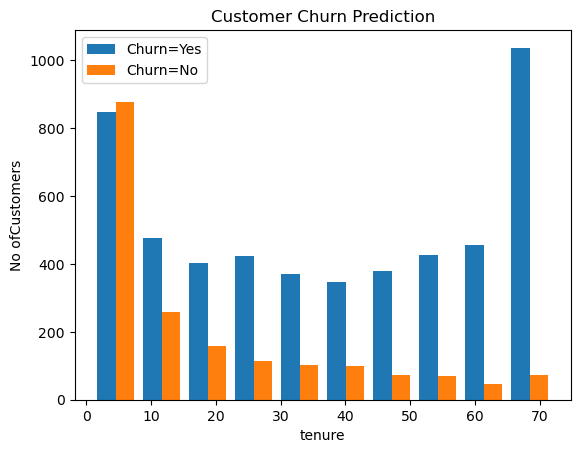

In [24]:
plt.xlabel("tenure")
plt.ylabel("No ofCustomers")
plt.title("Customer Churn Prediction")

plt.hist([tenure_churn_No,tenure_churn_Yes],label=['Churn=Yes','Churn=No'])
plt.legend()

In [25]:
gender_churn_female=df1[df1.Churn=='Yes'].gender
gender_churn_female.count()

1869

In [26]:
gender_churn_male=df1[df1.Churn=='No'].gender
gender_churn_male.count()

5163

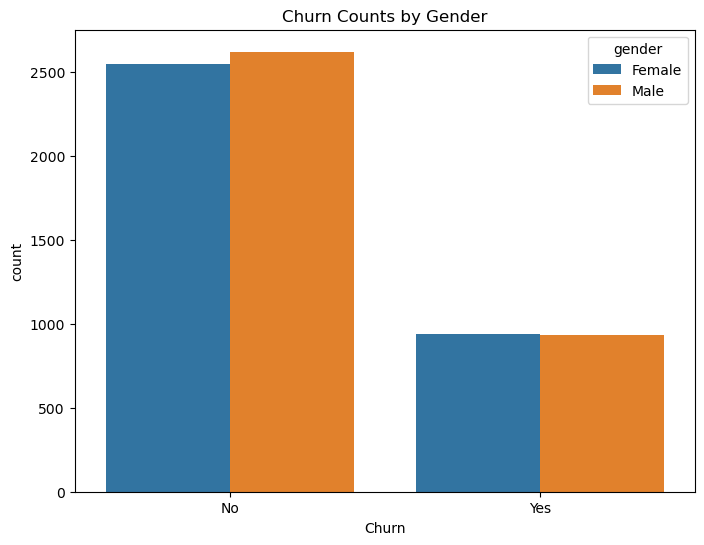

In [27]:
import seaborn as sns
# Create separate DataFrames for Female and Male customers who churned
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', hue='gender', data=df1)
plt.title('Churn Counts by Gender')
plt.show()

In [28]:
(df1['Churn']).value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [29]:
# To cehck the unique value in  object columns 
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}:{df[column].unique()}')
        

In [30]:
print_unique_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [31]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_4012\2045096646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
C:\Users\Hp\AppData\Local\Temp\ipykernel_4012\2045096646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [32]:
print_unique_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [33]:
# convert yes to 1 and no to 0 columns 

yes_no_columns=["Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity", "OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","PaperlessBilling","Churn"]


for column in yes_no_columns:
    df1[column].replace({"Yes":1,"No":0},inplace=True)
    print (f'({column}):{df1[column].unique()}')

(Partner):[1 0]
(Dependents):[0 1]
(PhoneService):[0 1]
(MultipleLines):[0 1]
(InternetService):['DSL' 'Fiber optic' 0]
(OnlineSecurity):[0 1]
(OnlineBackup):[1 0]
(DeviceProtection):[0 1]
(TechSupport):[0 1]
(StreamingTV):[0 1]
(StreamingMovies):[0 1]
(PaperlessBilling):[1 0]
(Churn):[0 1]


C:\Users\Hp\AppData\Local\Temp\ipykernel_4012\1967344976.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[column].replace({"Yes":1,"No":0},inplace=True)


In [34]:
for column in df1:
    print (f'({column}):{df1[column].unique()}')

(gender):['Female' 'Male']
(SeniorCitizen):[0 1]
(Partner):[1 0]
(Dependents):[0 1]
(tenure):[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
(PhoneService):[0 1]
(MultipleLines):[0 1]
(InternetService):['DSL' 'Fiber optic' 0]
(OnlineSecurity):[0 1]
(OnlineBackup):[1 0]
(DeviceProtection):[0 1]
(TechSupport):[0 1]
(StreamingTV):[0 1]
(StreamingMovies):[0 1]
(Contract):['Month-to-month' 'One year' 'Two year']
(PaperlessBilling):[1 0]
(PaymentMethod):['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
(MonthlyCharges):[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
(TotalCharges):[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
(Churn):[0 1]


In [35]:
df1['gender'].replace({"Female":1 ,"Male":0},inplace=True)
df1.gender.unique()

C:\Users\Hp\AppData\Local\Temp\ipykernel_4012\2118579957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({"Female":1 ,"Male":0},inplace=True)


array([1, 0], dtype=int64)

In [36]:
df1


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,1,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,1,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,0,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [37]:
# convert categorical variables into the numerical variables 

df2=pd.get_dummies(data=df1,columns=["InternetService","Contract","PaymentMethod"])
df2.columns


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_0', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [38]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1553,1,0,1,1,39,1,0,0,0,1,...,False,False,True,True,False,False,True,False,False,False
6555,0,0,0,0,18,1,0,0,0,0,...,True,False,False,False,True,False,False,False,False,True
3659,0,0,1,0,67,1,1,1,1,1,...,False,False,True,False,True,False,False,True,False,False
1723,1,0,1,1,6,1,0,0,0,0,...,True,False,False,False,False,True,False,False,False,True
3150,0,0,0,0,17,0,0,0,0,0,...,False,True,False,True,False,False,False,False,False,True


In [39]:

df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_0                             bool
InternetService_DSL                           bool
InternetService_Fiber optic    

In [40]:

        
        
def print_unique_column_values(df2):
    for column in df2:
        if df1[column].dtypes == 'bool':
            print(f'{column}: {df1[column].unique()}')
        

In [41]:
true_false_columns = [
    'InternetService_0', 'InternetService_DSL', 'InternetService_Fiber optic',
    'Contract_Month-to-month', 'Contract_One year','Contract_Two year',
    'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)',
    'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'
]


# Replace True with 0 and False with 1 in specified columns
df2.loc[:,true_false_columns]=df2[true_false_columns].replace({True: 0, False: 1})

# Print unique values after replacement for each column
for column in true_false_columns:
    print(f'{column}: {df2[column].unique()}')

InternetService_0: [1 0]
InternetService_DSL: [0 1]
InternetService_Fiber optic: [1 0]
Contract_Month-to-month: [0 1]
Contract_One year: [1 0]
Contract_Two year: [1 0]
PaymentMethod_Bank transfer (automatic): [1 0]
PaymentMethod_Credit card (automatic): [1 0]
PaymentMethod_Electronic check: [0 1]
PaymentMethod_Mailed check: [1 0]


In [42]:
for column in df2:
    print(f'{column}: {df2[column].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
PaperlessBilling: [1 0]
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]
InternetService_0: [1 0]
InternetService_DSL: [0 1]
InternetService_Fiber optic: [1 0]
Contract_Month-to-month: [0 1]
Contract_One year: [1 0]
Contract_Two year: [1 0]
PaymentMethod_Bank transfer (automatic): [1 0]
PaymentMethod_Credit card (automatic): [1 0]
PaymentMethod_Electronic check: [0 1]
PaymentMethod_Mailed check: [1 0]


In [43]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,1,0,1,1,1,1,0,1
1,0,0,0,0,34,1,0,1,0,1,...,1,0,1,1,0,1,1,1,1,0
2,0,0,0,0,2,1,0,1,1,0,...,1,0,1,0,1,1,1,1,1,0
3,0,0,0,0,45,0,0,1,0,1,...,1,0,1,1,0,1,0,1,1,1
4,1,0,0,0,2,1,0,0,0,0,...,1,1,0,0,1,1,1,1,0,1


In [44]:
# now we used MIN MAX scaler
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
scale_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
df2[scale_columns] = Scaler.fit_transform(df2[scale_columns])


In [45]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,1,0,1,1,1,1,0,1
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,1,1,0,1,1,1,1,0
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,1,0,1,1,1,1,1,0
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,1,1,0,1,0,1,1,1
4,1,0,0,0,0.014085,1,0,0,0,0,...,1,1,0,0,1,1,1,1,0,1


In [46]:
for column in  df2:
    print(f'{column}:{df2[column].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
Stream

In [47]:
X=df2.drop('Churn',axis='columns')
y=df2['Churn']

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [49]:
X_train.shape

(5625, 26)

In [52]:
X_test.shape

(1407, 26)

In [62]:
# Build a Artificial Nurealmode Network 

import tensorflow as tf
from tensorflow import keras
model=keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation='relu'),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])


model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])


In [67]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3501 - accuracy: 0.8348
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3500 - accuracy: 0.8354
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3514 - accuracy: 0.8320
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3500 - accuracy: 0.8327
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3474 - accuracy: 0.8364
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3471 - accuracy: 0.8391
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3485 - accuracy: 0.8343
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3481 - accuracy: 0.8356
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3468 - accuracy: 0.8364
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3453 - accura

In [71]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.5577 - accuracy: 0.7647


[0.5576829314231873, 0.764747679233551]

In [69]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 26)                702       
                                                                 
 dense_8 (Dense)             (None, 30)                810       
                                                                 
 dense_9 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1543 (6.03 KB)
Trainable params: 1543 (6.03 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [109]:
y_pred=model.predict(X_test)
y_pred[:5]

44/44 [==============================] - 0s 1ms/step


array([[0.00108967],
       [0.20777814],
       [0.81507486],
       [0.00293353],
       [0.07495338]], dtype=float32)

In [110]:
y_test[:5]

2481    0
6784    0
6125    1
3052    0
4099    0
Name: Churn, dtype: int64

In [111]:
#y_predict=[]
#for elements in y_pred:
    #if element >0.5:
       # y_pred.append(1)
    #else:
        #y_pred.append(0)
        
        
        
        
yp = []

for element in y_pred:
    if element > 0.5:
        yp.append(1)
    else:
        yp.append(0)        

In [112]:
y_test[:10]

2481    0
6784    0
6125    1
3052    0
4099    0
3223    0
3774    0
3469    0
3420    0
1196    0
Name: Churn, dtype: int64

In [113]:
yp[:10]

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [114]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,yp))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1033
           1       0.57      0.47      0.52       374

    accuracy                           0.76      1407
   macro avg       0.69      0.67      0.68      1407
weighted avg       0.75      0.76      0.76      1407



Text(95.72222222222221, 0.5, 'Truth')

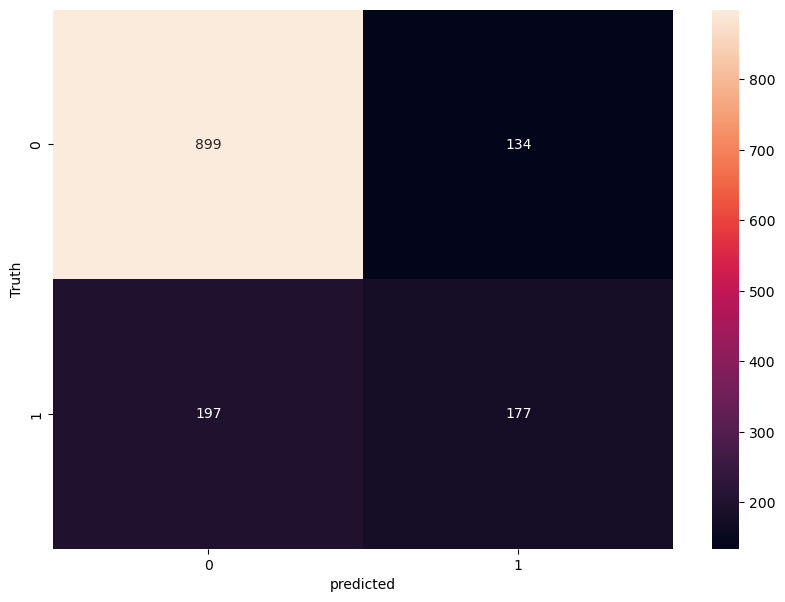

In [124]:
import seaborn as sn
confusion_matrix=tf.math.confusion_matrix(labels=y_test,predictions=yp)

plt.figure(figsize=(10,7))
sn.heatmap(confusion_matrix,annot=True,fmt='d')
plt.xlabel("predicted")
plt.ylabel("Truth")

In [121]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
